## Homework 2

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Sasha/Downloads/course_lead_scoring.csv')

In [3]:
len(df)

1462

In [4]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


## Data preparation
Check if the missing values are presented in the features.
If there are missing values:
For caterogiral features, replace them with 'NA'
For numerical features, replace with with 0.0

In [5]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
#find the categorical features
categorical_features = list(df.dtypes[df.dtypes == 'object'].index)


In [7]:
categorical_features

['lead_source', 'industry', 'employment_status', 'location']

In [8]:
for col in categorical_features:
    df[col] = df[col].fillna('NA')

In [9]:
df.isnull().sum()

lead_source                   0
industry                      0
number_of_courses_viewed      0
annual_income               181
employment_status             0
location                      0
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [10]:
for col in categorical_features:
    df[col] = df[col].astype(str)

In [11]:
#out of all the numerical features only annual_income has missing values 
df['annual_income'] = df['annual_income'].fillna(0.0)

In [12]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Question 1
What is the most frequent observation (mode) for the column industry?

In [13]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

In [14]:
#check the rest
df['industry'].value_counts()

industry
retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: count, dtype: int64

## Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

In [15]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [16]:
numerical_features = list(df.select_dtypes(include=[np.number]))

In [17]:
numerical_features 

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [18]:
corr_matrix = df[numerical_features ].corr(method='spearman')

In [19]:
corr_matrix

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.022638,-0.018994,-0.016662,0.450307
annual_income,0.022638,1.000000,0.039228,0.022196,0.071801
interaction_count,-0.018994,0.039228,1.000000,0.006205,0.380502
lead_score,-0.016662,0.022196,0.006205,1.000000,0.193144
converted,0.450307,0.071801,0.380502,0.193144,1.000000


In [20]:
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

<Axes: >

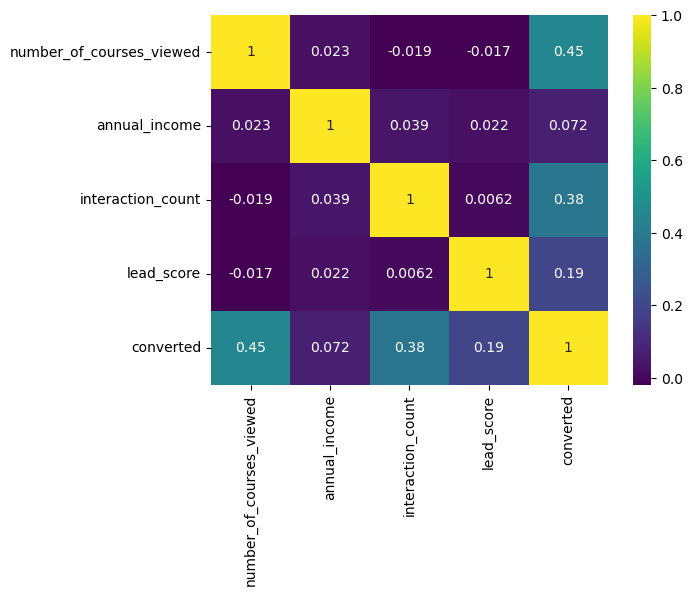

In [21]:
plt.show()

## Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value y is not in your dataframe.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [24]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [25]:
y_train = df_train.converted.values
y_test = df_test.converted.values
y_val = df_val.converted.values

In [26]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Question 3
Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the biggest mutual information score?

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
def calculate_mi(series):
    return mutual_info_score(series, y_train)

df_mi = df_train[categorical_features].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())

,MI
lead_source,0.035396
employment_status,0.012938
industry,0.011575
location,0.004464


## Question 4
Now let's train a logistic regression.
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [29]:
#for One-hot encoding
from sklearn.feature_extraction import DictVectorizer

In [30]:
numerical_features2 = list(df_train.select_dtypes(include=[np.number]))

In [31]:
numerical_features2

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [32]:
train_dict = df_train[categorical_features].to_dict(orient='records')

In [33]:
dv = DictVectorizer(sparse=False)

In [34]:
X_train_c = dv.fit_transform(train_dict)

In [35]:
X_train = np.hstack([X_train_c, df_train[numerical_features2].values])

In [36]:
X_train.shape

(876, 31)

In [37]:
X_train

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 5.8472e+04, 5.0000e+00,
        3.0000e-02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.1738e+04, 6.0000e+00,
        7.7000e-01],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 8.1973e+04, 2.0000e+00,
        5.9000e-01],
       ...,
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 8.9042e+04, 4.0000e+00,
        7.5000e-01],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        6.5000e-01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 5.0259e+04, 3.0000e+00,
        5.4000e-01]])

In [38]:
val_dict = df_val[categorical_features].to_dict(orient='records')

In [39]:
X_val_c = dv.transform(val_dict)
X_val = np.hstack([X_val_c, df_val[numerical_features2].values])

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [42]:
model.coef_[0].round(3)

array([-0.015,  0.034,  0.003,  0.012, -0.103, -0.025,  0.049, -0.02 ,
       -0.013, -0.003, -0.009, -0.032, -0.016,  0.02 , -0.012, -0.012,
       -0.115,  0.08 , -0.03 ,  0.004, -0.011, -0.011, -0.006,  0.008,
        0.006, -0.033, -0.025,  0.454, -0.   ,  0.311,  0.051])

In [43]:
model.intercept_[0]

np.float64(-0.06914728027830143)

In [44]:
model.predict_proba(X_train)

array([[0.42085657, 0.57914343],
       [0.12716509, 0.87283491],
       [0.41183894, 0.58816106],
       ...,
       [0.25265785, 0.74734215],
       [0.3302157 , 0.6697843 ],
       [0.14407823, 0.85592177]])

In [45]:
accuracy = model.score(X_val, y_val)

In [46]:
accuracy

0.6996587030716723

In [47]:
y_pred = model.predict_proba(X_val)[:, 1]

In [48]:
dec = (y_pred >= 0.5) 

In [49]:
y_val

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0])

In [50]:
dec.astype(int)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0])

In [51]:
acc = (y_val == dec).mean()

In [52]:
round(acc, 2)

np.float64(0.7)

## Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model using the same features and parameters as in Q4 (without rounding).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

In [291]:
dv.get_feature_names_out()

array(['employment_status=NA', 'employment_status=employed',
       'employment_status=self_employed', 'employment_status=student',
       'employment_status=unemployed', 'industry=NA',
       'industry=education', 'industry=finance', 'industry=healthcare',
       'industry=manufacturing', 'industry=other', 'industry=retail',
       'industry=technology', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america'], dtype=object)

In [299]:
def one_less (cat_var):
    train_dict = df_train[cat_var].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train_c = dv.fit_transform(train_dict)
    X_train = np.hstack([X_train_c, df_train[numerical_features2].values])
    
    val_dict = df_val[cat_var].to_dict(orient='records')
    X_val_c = dv.transform(val_dict)
    X_val = np.hstack([X_val_c, df_val[numerical_features2].values])

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    sc = model.score(X_val, y_val)
    
    return sc

In [300]:
#test
one_less(categorical_features)

0.6996587030716723

In [301]:
#Industry 
no_industry = [x for x in categorical_features if x!='industry']

In [302]:
no_industry

['lead_source', 'employment_status', 'location']

In [303]:
print(one_less(no_industry))

0.6996587030716723


In [308]:
#lead source
no_lead_source = [x for x in categorical_features if x!='lead_source']
no_lead_source

['industry', 'employment_status', 'location']

In [306]:
one_less(no_lead_source)

0.7030716723549488

In [307]:
accuracy - one_less(no_lead_source)

-0.0034129692832765013

In [309]:
#employment_status
no_employment_status = [x for x in categorical_features if x!='employment_status']
one_less(no_employment_status)

0.6962457337883959

In [310]:
accuracy-one_less(no_employment_status)

0.0034129692832763903

In [311]:
#location
no_location = [x for x in categorical_features if x!='location']
one_less(no_location)

In [312]:
one_less(categorical_features)-one_less(no_location)

-0.010238907849829393

## Question 6
Now let's train a regularized logistic regression.
Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
Train models using all the features as in Q4.
Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

In [53]:
for c in  [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    print('%6s' %c, model.score(X_val, y_val))

  0.01 0.6996587030716723
   0.1 0.6996587030716723
     1 0.6996587030716723
    10 0.6996587030716723
   100 0.6996587030716723


In [54]:
model = LogisticRegression(solver='liblinear', C=100, max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

In [55]:
model.score(X_val, y_val)

0.6996587030716723